In this notebook, we evaluate the trained neural networks. The first part uses the large scale network, and the second is based on its mobile version.

## Speaker verification using large-scale neural embedding network.

In [3]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

identification = SpeakerIdentificationTf(**{"enrollment_folder": "libri_test/enrollment_folder",
                                            "data_folder": "libri_test",
                                            "model": "pytorch"})
identification.enroll(seq_len=2, num_seq=5, normalize=True)
identification.query(seq_len=2, num_seq=2, normalize=True)
identification.compute_smallest_distances()


Enrolling speaker:  1089.wav
Enrolling speaker:  1188.wav
Enrolling speaker:  121.wav
Enrolling speaker:  1221.wav
Enrolling speaker:  1284.wav
Enrolling speaker:  237.wav
Enrolling speaker:  260.wav
Enrolling speaker:  61.wav
Enrolling speaker:  672.wav
Enrolling speaker:  908.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1089.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1188.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/121.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1221.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1284.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/237.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/260.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/61.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/672.wav
Computing qu

In [6]:
#pytorch
thresholds_cosine = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

evaluation = identification.evaluate(thresholds_cosine)
y_true = evaluation[0]["y_true"]
y_prob = []


for i in range(len(identification.smallest_distances)):
    y_prob.append(identification.smallest_distances[i]["Distance"])
print(y_true, y_prob)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.9321, 0.9493, 0.9049, 0.9199, 0.5957, 0.6769, 0.7152, 0.8848, 0.7441, 0.8862, 0.6786, 0.585, 0.3021, 0.5968, 0.7256, 0.5714, 0.4703, 0.4937, 0.6705, 0.639, 0.3865, 0.6262, 0.6485, 0.8162, 0.5019, 0.7499, 0.5533, 0.4745, 0.83, 0.6909, 0.5709, 0.7813, 0.7041, 0.7817, 0.798, 0.8323, 0.714, 0.6569, 0.6039, 0.7921]


/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Thresholds:  [0.9493 0.8848 0.7499 0.7441 0.7256 0.7152 0.6786 0.6769 0.5968 0.5957
 0.3021]


<Figure size 432x288 with 0 Axes>

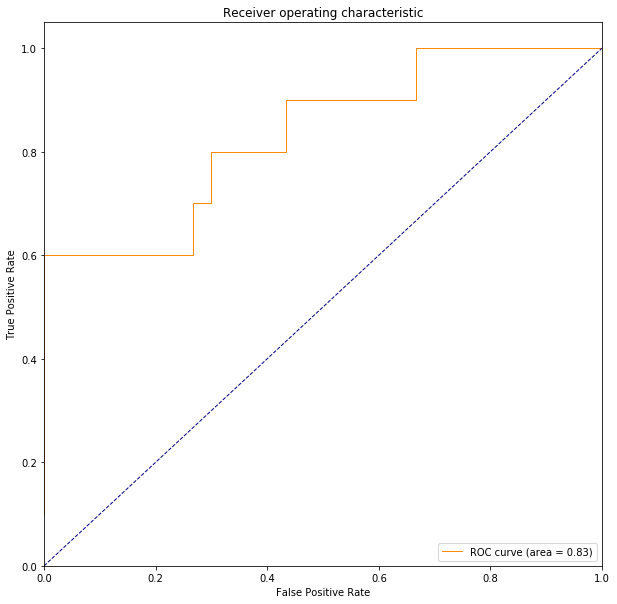

In [7]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print("Thresholds: ", thresholds)
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Speaker verification using large-scale neural embedding network.

In [8]:
from own_library.speaker_identificationTF import SpeakerIdentificationTf
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

identification = SpeakerIdentificationTf(**{"enrollment_folder": "libri_test/enrollment_folder",
                                            "data_folder": "libri_test",
                                            "model": "tensorflow"})
identification.enroll(seq_len=3.58, num_seq=5, normalize=False)
identification.query(seq_len=3.58, num_seq=2, normalize=False)
identification.compute_smallest_distances()


Enrolling speaker:  1089.wav
Enrolling speaker:  1188.wav
Enrolling speaker:  121.wav
Enrolling speaker:  1221.wav
Enrolling speaker:  1284.wav
Enrolling speaker:  237.wav
Enrolling speaker:  260.wav
Enrolling speaker:  61.wav
Enrolling speaker:  672.wav
Enrolling speaker:  908.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1089.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1188.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/121.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1221.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/1284.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/237.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/260.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/61.wav
Computing query embeddings for speaker:  libri_test/enrollment_folder/672.wav
Computing qu

In [9]:
#pytorch
thresholds_cosine = [0.9, 0.91, 0.92, 0.93, 0.94,  0.95, 0.96, 0.97, 0.98, 0.99, 1]

evaluation = identification.evaluate(thresholds_cosine)
y_true = evaluation[0]["y_true"]
y_prob = []


for i in range(len(identification.smallest_distances)):
    y_prob.append(identification.smallest_distances[i]["Distance"])
print(y_true, y_prob)
print(len(y_prob))
print(len(y_true))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.9508, 0.9913, 0.9728, 0.9924, 0.9864, 0.9937, 0.9397, 0.9909, 0.9888, 0.976, 0.9629, 0.913, 0.8447, 0.9333, 0.9528, 0.9137, 0.7346, 0.8256, 0.9059, 0.7653, 0.8787, 0.9144, 0.7829, 0.9297, 0.8674, 0.8852, 0.8124, 0.8652, 0.9157, 0.8761, 0.8384, 0.9034, 0.8686, 0.9234, 0.9205, 0.9299, 0.8916, 0.8259, 0.8194, 0.8066]
40
40


/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.9937 0.9728 0.9528 0.9397 0.7346]


<Figure size 432x288 with 0 Axes>

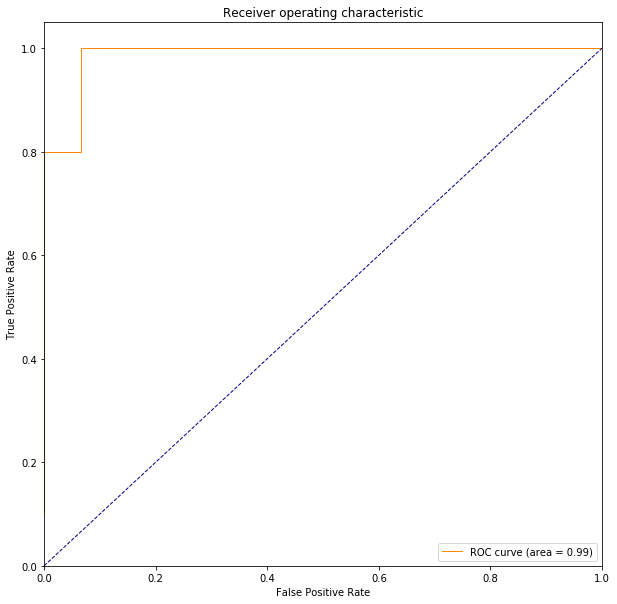

In [10]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
print(thresholds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()